# Import data server Nasa Giovanni

In [2]:
direcciones = open('Txt/prov.postprocess+sMpAn+dGPM_3IMERGHH_03_precipitationCal+zNA+t20151101000000_20151104235959+b5.4712E_47.1094N_15.5347E_55.2393N.txt','r').readlines()
direcciones[0][-33:-1]

'20151101000000.5E_47N_15E_55N.nc'

In [4]:
import urllib.request, os

for direccion in direcciones:
    u = urllib.request.urlretrieve(direccion)[:-1]
    print (u[0])
    print (direccion[-33:-1])
    os.rename(u[0], 'NetCDF/' + direccion[-33:-1])

/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpy9or1qv_
20151101000000.5E_47N_15E_55N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpvyxra007
20151101003000.5E_47N_15E_55N.nc


KeyboardInterrupt: 

<hr />

# Call to files and listing

Analizando lugar de trabajo

In [7]:
%pwd

'/Users/saulmontoya/MEGAsync/GitHub/17_Interactive_Precipitation_Plot_Germany'

In [8]:
from glob import glob
archivos = sorted(glob('NetCDF/*.nc'))
archivos[:5]

['NetCDF/20151101000000.5E_47N_15E_55N.nc',
 'NetCDF/20151101003000.5E_47N_15E_55N.nc',
 'NetCDF/20151101010000.5E_47N_15E_55N.nc',
 'NetCDF/20151101013000.5E_47N_15E_55N.nc',
 'NetCDF/20151101020000.5E_47N_15E_55N.nc']

<hr />

# Function definition for netCDF opening

In [9]:
import netCDF4
def buscarprecip(fn):
    with netCDF4.Dataset(fn) as f:
        return f.variables['GPM_3IMERGHH_03_precipitationCal'][:]

In [10]:
buscarprecip(archivos[0])[0,30,10:20]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

<hr/>
# Search for limits of representation

In [11]:
dominio = netCDF4.Dataset(archivos[0])
dominio.variables.items

<function OrderedDict.items>

In [12]:
lons = dominio.variables['lon'][:]
lats = dominio.variables['lat'][:]
precip_units = dominio.variables['GPM_3IMERGHH_03_precipitationCal'].units

<hr />

# Data collection of precipitation as a large Numpy array

In [13]:
import numpy as np
precipcomp = np.empty((len(archivos),81,100))
i = 0
for archivo in archivos:
    precipcomp[i,:,:]=buscarprecip(archivo)[0,:,:]
    i = i + 1
i

192

<hr/>
# Importing packages for rendering maps

In [14]:
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
lon_0 = lons.mean()
lat_0 = lats.mean()

Populating the interactive namespace from numpy and matplotlib


<hr/>
# Generation of interactive representation

In [15]:
def ploteo(x):
  
    m = Basemap(width=1500000,height=1000000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)
    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)
    
    m.bluemarble(alpha=0.85)

    # Plot Data
    cs = m.pcolor(xi,yi,np.squeeze(precipcomp[x, :, :]),cmap='Blues',alpha=0.85)
    
    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates(linewidth=0.2)
    m.drawcountries(linewidth=2)

    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label(precip_units)

    # Add Title
    plt.title('Precipitacion mm/hr')

    figsize(20,10)

    return plt.show()

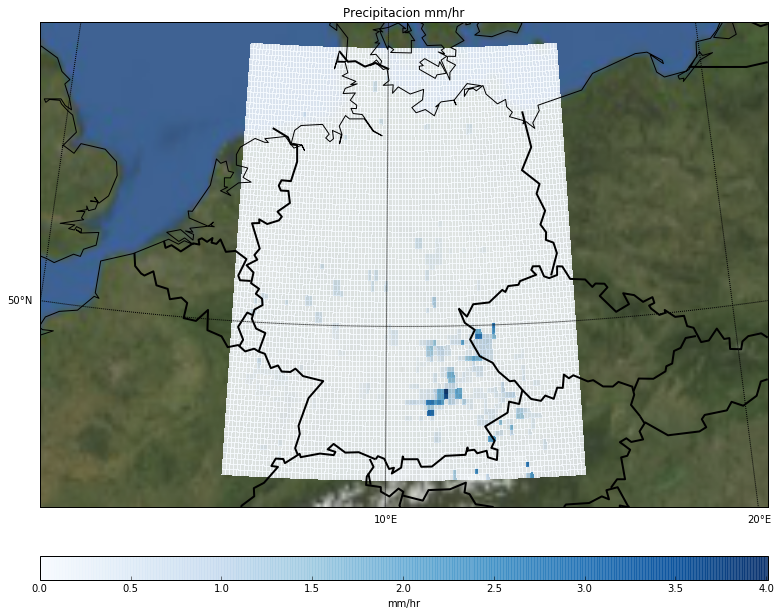

In [17]:
from ipywidgets import widgets  
def valor(x):
    return ploteo(x)
widgets.interact(valor, x=(0,len(archivos)-1,1))

For any questions:

# saulmontoya@gidahatari.com